In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [30]:
#Read data
frailty_data = pd.read_csv('raw_frailty_data.csv')
print(frailty_data)

   Height  Weight  Age  Grip Strength Frailty
0    65.8     112   30             30       N
1    71.5     136   19             31       N
2    69.4     153   45             29       N
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y
5    68.7     123   50             26       N
6    69.8     141   51             22       Y
7    70.1     136   23             20       Y
8    67.9     112   17             19       N
9    66.8     120   39             31       N


**Data Processing**

In [31]:
#Convert weight from pounds to kilograms
frailty_data['Weight_in_kg'] = frailty_data['Weight'] * 0.453592
frailty_data['Weight_in_kg'] = frailty_data['Weight_in_kg'].round(2)

#Convert Frailty column to binary
label = LabelEncoder()
frailty_data['Frailty']=label.fit_transform(frailty_data['Frailty'])

frailty_data.to_csv('clean_frailty_data.csv',index=False)
frailty_data

,Height,Weight,Age,Grip Strength,Frailty,Weight_in_kg
0,65.8,112,30,30,0,50.80
1,71.5,136,19,31,0,61.69
2,69.4,153,45,29,0,69.40
3,68.2,142,22,28,1,64.41
4,67.8,144,29,24,1,65.32
5,68.7,123,50,26,0,55.79
6,69.8,141,51,22,1,63.96
7,70.1,136,23,20,1,61.69
8,67.9,112,17,19,0,50.80
9,66.8,120,39,31,0,54.43


In [32]:
frailty_data = frailty_data.iloc[:,[1,5,3,2,0,4]]
frailty_data

,Weight,Weight_in_kg,Grip Strength,Age,Height,Frailty
0,112,50.80,30,30,65.8,0
1,136,61.69,31,19,71.5,0
2,153,69.40,29,45,69.4,0
3,142,64.41,28,22,68.2,1
4,144,65.32,24,29,67.8,1
5,123,55.79,26,50,68.7,0
6,141,63.96,22,51,69.8,1
7,136,61.69,20,23,70.1,1
8,112,50.80,19,17,67.9,0
9,120,54.43,31,39,66.8,0


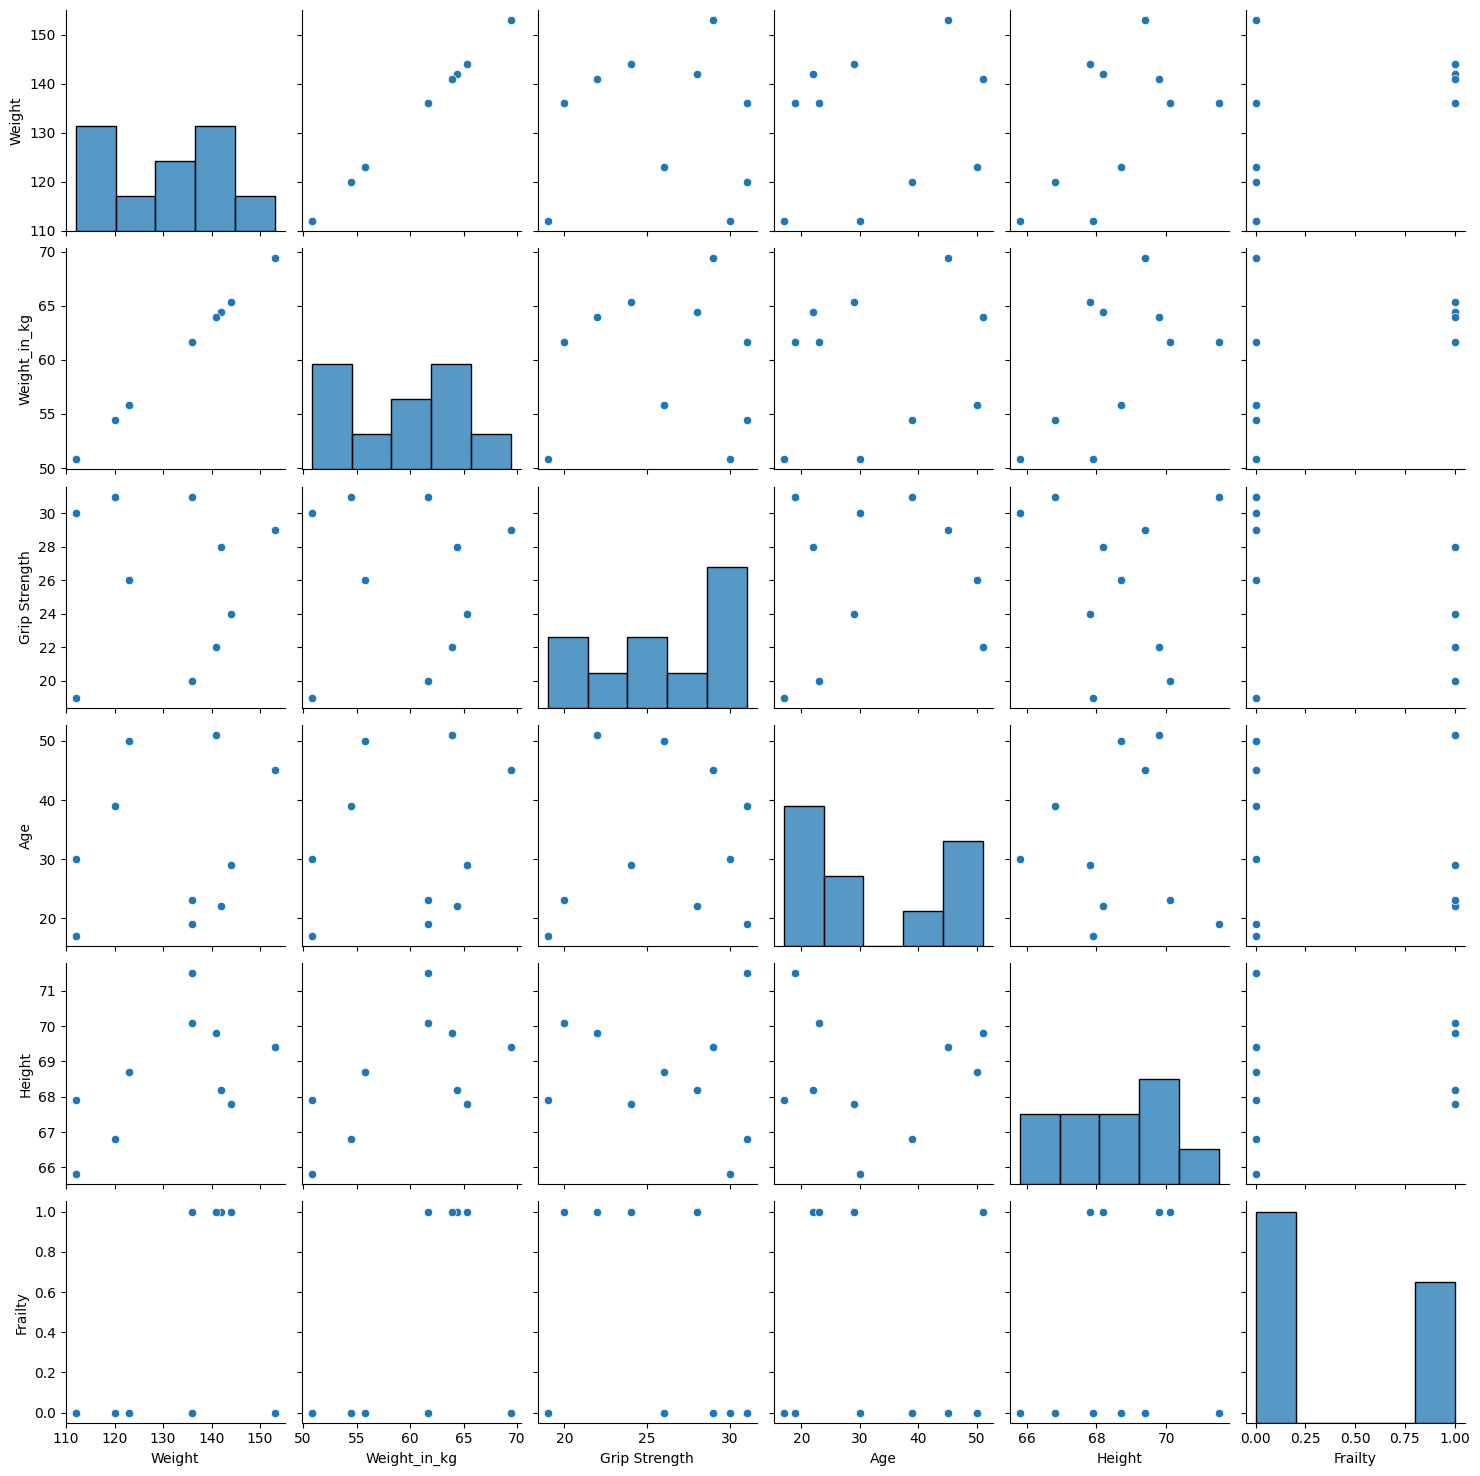

In [33]:
#import seaborn as sns
sns.pairplot(frailty_data)
plt.show()


In [11]:
X = frailty_data.iloc[:,:-1]
y = frailty_data.iloc[:,-1]
X


,Weight,Weight_in_kg,Height,Age,Grip Strength
0,112,50.80,65.8,30,30
1,136,61.69,71.5,19,31
2,153,69.40,69.4,45,29
3,142,64.41,68.2,22,28
4,144,65.32,67.8,29,24
5,123,55.79,68.7,50,26
6,141,63.96,69.8,51,22
7,136,61.69,70.1,23,20
8,112,50.80,67.9,17,19
9,120,54.43,66.8,39,31


In [12]:
#split train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state= 42)

In [13]:
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)
ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [14]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X,y)
predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [15]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)


In [16]:
model.predict(X)
model.score(X, y)

1.0

In [17]:
confusion_matrix(y, model.predict(X))

array([[6, 0],
       [0, 4]])

In [18]:
TN, FP, FN, TP = confusion_matrix(y, model.predict(X)).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

True Positive(TP)  =  4
False Positive(FP) =  0
True Negative(TN)  =  6
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000
